In [37]:
import time

def log_exec_time(function):

    def timed(*args, **kwargs):
        starting_time = time.time()
        function(*args, **kwargs)
        end_time = time.time()
        time_needed = end_time - starting_time
        return time_needed

    return timed

In [46]:
from collections import Counter

@log_exec_time
def count_words_dict(file_path):
    with open(file_path, 'r') as f:
        lines = f.read()
        words = lines.split(" ")
        counts = dict()

        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
        return counts

@log_exec_time
def count_word_counter(file_path):
    with open(file_path, 'r') as f:
        lines = f.read()
        counts = dict()

        counts = Counter(lines.split(" "))
        return counts

In [86]:
count_words_dict("./t8.shakespeare.txt")

0.2740323543548584

In [88]:
count_word_counter("./t8.shakespeare.txt")

0.1705172061920166

In [111]:
import numpy as np

time_dict = []
time_counter = []

for i in range(100):
    time_dict.append(count_words_dict("./t8.shakespeare.txt"))
    time_counter.append(count_word_counter("./t8.shakespeare.txt"))

print("Average time for the dictionary: ", np.average(time_dict))
print("Time Variance for the dictionary: ", np.var(time_dict))
print("")
print("Average time for the counter function: ", np.average(time_counter))
print("Time Variance for the counter function: ", np.var(time_counter))


Average time for the dictionary:  0.24295719861984252
Time Variance for the dictionary:  0.0021043757656461536

Average time for the counter function:  0.17229181051254272
Time Variance for the counter function:  0.001066074632097815


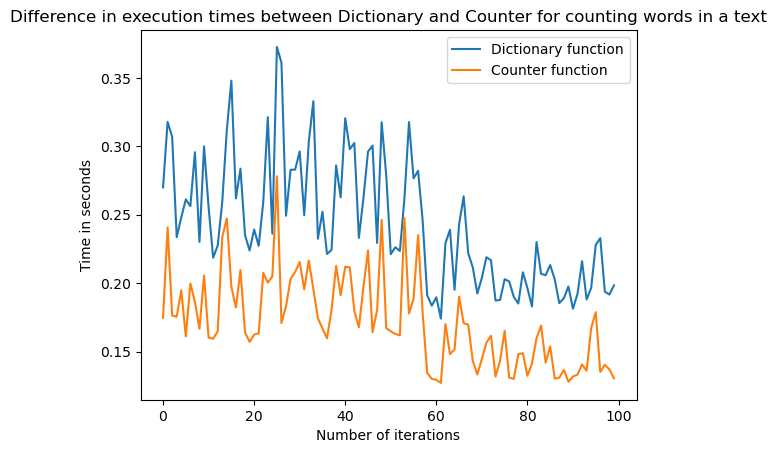

In [112]:
import matplotlib.pyplot as plt

plt.plot(time_dict, label = "Dictionary function")
plt.plot(time_counter, label = "Counter function")
plt.title("Difference in execution times between Dictionary and Counter for counting words in a text")
plt.xlabel("Number of iterations")
plt.ylabel("Time in seconds")
plt.legend()
plt.show()